**INSTRUCTIONS**

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:

    1. Data from our lives
    2. Variable selection

Follow the prompts in the attached jupyter notebook. 

**We are using the same data as for the previous homework**. Use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a variable selection/feature reduction would be appropriate.

*Your Answer:*

Situation: Medical imaging, such as MRI scans, generate a vast number of data points for each patient, resulting in high-dimensional data sets.These data typically include numerous features (pixels) representing different aspects of tissues, structures, or organs.

Challenge: Handling high-dimensional data poses a challenge as not all features contribute equally to diagnoses. This complexity hinders efficient analysis and may lead to computational inefficiencies.

Feature Reduction: Techniques like PCA or autoencoders streamline this data by extracting essential patterns while retaining critical information. This reduction aids in more efficient analysis and clearer visualization of anomalies.

Diagnostic Precision: By focusing on key features, reduced data sets enable clearer identification of abnormalities, improving diagnostic accuracy.

Efficiency and Generalization: Feature reduction not only optimizes computational resources but also helps models generalize better across different patient groups.

Finding: In medical imaging analysis, feature reduction techniques enhance efficiency, aid in precise diagnostics, and support more effective decision-making by healthcare professionals.

In [35]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [36]:
#Read in data
df =pd.read_csv('auto_imports1.csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [37]:
##your code here

# To Check the data types of all columns in the DataFrame
Auto_data_types = df.dtypes

print(Auto_data_types)

fuel_type       object
body            object
wheel_base     float64
length         float64
width          float64
heights        float64
curb_weight      int64
engine_type     object
cylinders       object
engine_size      int64
bore            object
stroke          object
comprassion    float64
horse_power     object
peak_rpm        object
city_mpg         int64
highway_mpg      int64
price            int64
dtype: object


In [38]:
## Your code here

## Replacing ? with none throught the dataset
df = df.replace('?', None)

##converting object to float variables
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horse_power'] = df['horse_power'].astype(float)
df['peak_rpm'] = df['peak_rpm'].astype(float)

In [39]:
# Checking for remaining '?'
question_marks_remaining = (df == '?').sum().sum()

if question_marks_remaining == 0:
    print("no remaining '?' values in the dataset.")
else:
    print("{question_marks_remaining} remaining '?' values in the dataset.")


no remaining '?' values in the dataset.


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   body         201 non-null    object 
 2   wheel_base   201 non-null    float64
 3   length       201 non-null    float64
 4   width        201 non-null    float64
 5   heights      201 non-null    float64
 6   curb_weight  201 non-null    int64  
 7   engine_type  201 non-null    object 
 8   cylinders    201 non-null    object 
 9   engine_size  201 non-null    int64  
 10  bore         197 non-null    float64
 11  stroke       197 non-null    float64
 12  comprassion  201 non-null    float64
 13  horse_power  199 non-null    float64
 14  peak_rpm     199 non-null    float64
 15  city_mpg     201 non-null    int64  
 16  highway_mpg  201 non-null    int64  
 17  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(4)
memory usage: 2

In [41]:
## Your code here

# Droping the specified columns and creating a new DataFrame df2
df2 = df.drop(columns=["body", "engine_type", "cylinders"])

In [42]:
df2.head()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,gas,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,gas,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,gas,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,gas,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [43]:
## your code goes here

## Droping rows with nan values
df2.dropna(inplace=True)


In [44]:
df2.isnull().sum()

fuel_type      0
wheel_base     0
length         0
width          0
heights        0
curb_weight    0
engine_size    0
bore           0
stroke         0
comprassion    0
horse_power    0
peak_rpm       0
city_mpg       0
highway_mpg    0
price          0
dtype: int64

In [45]:
## Your code goes here

# Creating dummy variables for fuel_type within df2 and droping the first level
df2 = pd.get_dummies(df2, columns=['fuel_type'], drop_first=True)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     195 non-null    float64
 1   length         195 non-null    float64
 2   width          195 non-null    float64
 3   heights        195 non-null    float64
 4   curb_weight    195 non-null    int64  
 5   engine_size    195 non-null    int64  
 6   bore           195 non-null    float64
 7   stroke         195 non-null    float64
 8   comprassion    195 non-null    float64
 9   horse_power    195 non-null    float64
 10  peak_rpm       195 non-null    float64
 11  city_mpg       195 non-null    int64  
 12  highway_mpg    195 non-null    int64  
 13  price          195 non-null    int64  
 14  fuel_type_gas  195 non-null    bool   
dtypes: bool(1), float64(9), int64(5)
memory usage: 23.0 KB


In [47]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,True
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,True
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,True
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,True
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,True


# 2. Variable selection

In our class so far we covered three types of feature selection techniques. They were: 
1. Filter methods
2. Wrapper methods
3. Embedded methods

Use the dataset 'auto_imports1.csv' from our previous homework. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

### 2.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

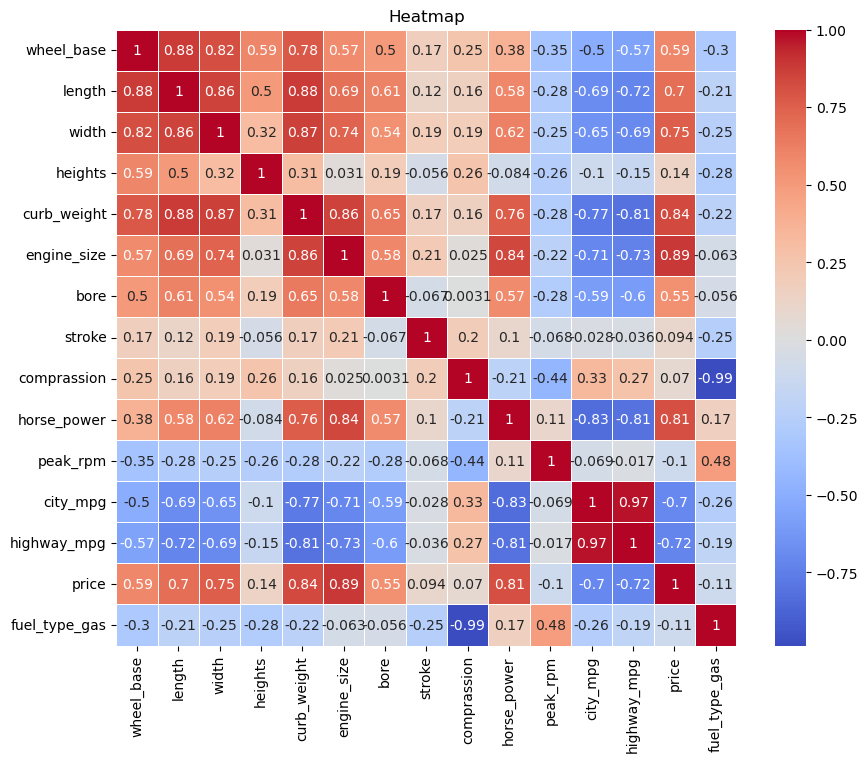

In [20]:
df2_matrix = df2.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2_matrix, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Heatmap')
plt.show()

In [49]:
# Displaying the correlation of each feature with the target variable (price)
corr_betwn_price = df2_matrix['price'].sort_values(ascending=False)
print(corr_betwn_price)


price            1.000000
engine_size      0.888942
curb_weight      0.835729
horse_power      0.811027
width            0.754273
length           0.695331
wheel_base       0.585793
bore             0.546873
heights          0.138291
stroke           0.093746
comprassion      0.069500
peak_rpm        -0.104333
fuel_type_gas   -0.108968
city_mpg        -0.702685
highway_mpg     -0.715590
Name: price, dtype: float64


After conducting correlation analysis between various features and the 'price' of automobiles, we identified specific features that demonstrate notable relationships with the price:

Strong Positive Correlation Features:

These variables have correlation coefficients ranging from approximately 0.59 to 0.89, 'engine_size', 'curb_weight', 'horse_power', 'width', 'length', and 'wheel_base' exhibited strong positive correlations with the price. This indicates that as these features increase (e.g., larger engine size, heavier curb weight, more horsepower, wider or longer cars), the price tends to rise accordingly. These attributes seem to significantly impact the pricing of automobiles, suggesting their importance in influencing price variations.

Moderate Negative Correlation Features:


'city_mpg' and 'highway_mpg' displayed moderate negative correlations with the price. Higher miles per gallon (mpg), both in city and highway driving conditions, were associated with lower prices. This suggests that cars with better fuel efficiency are often priced lower, reflecting a potential market tendency or consumer preference.
These findings propose that certain characteristics strongly align with automobile pricing trends. Considering these influential features for model construction or in-depth analysis might enhance our understanding of how they individually and collectively contribute to determining the price of vehicles within the dataset.

Weak Correlation with 'Price':

Other variables such as 'bore', 'heights', 'stroke', 'comprassion', 'peak_rpm', and 'fuel_type_gas' show weak correlations with 'price'. Their correlation coefficients are closer to zero, suggesting a weaker linear relationship with 'price'.

Utilizing these identified features could be instrumental in predictive modeling to estimate automobile prices more accurately. Furthermore, exploring these influential factors may offer valuable insights into market dynamics, consumer behavior, and the impact of specific vehicle attributes on pricing strategies within the automotive industry.

### 2.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

In [50]:
####The Recursive Feature Elimination (RFE) method

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Separating predictors and target variable
X = df2.drop(columns=['price'])
y = df2['price']

# Creating a linear regression model
lin_model = LinearRegression()

# Initializing RFE
r_f_e = RFE(lin_model, n_features_to_select=5)

# Fitting RFE
fit = r_f_e.fit(X, y)

# Getting the selected features
features_sel = X.columns[fit.support_]

print("RFE Selected features:")
print(features_sel)


RFE Selected features:
Index(['width', 'bore', 'comprassion', 'city_mpg', 'fuel_type_gas'], dtype='object')


The Recursive Feature Elimination (RFE) method, using a Linear Regression model, identified key features strongly influencing automobile prices:

'Width': Car width emerges as a significant factor affecting prices, suggesting that wider cars might command higher prices in the market.

'Bore': The engine's cylinder bore diameter holds importance, hinting that engine specifications play a role in pricing vehicles.

'Compression':it signifies engine efficiency, indicating its impact on pricing.

'City MPG': Better fuel efficiency in city driving conditions appears to associate with lower prices, indicating the influence of fuel economy on pricing strategies.

'Fuel Type (Gas)': The indication of a gas-powered engine suggests that fuel type significantly affects pricing.

These findings shed light on various aspects driving car prices, such as car dimensions, engine specifications, fuel efficiency, and fuel type. Understanding these influential features can aid market analysis, consumer behavior studies, and strategic pricing decisions within the automotive industry. Further exploration and modeling using these features could offer deeper insights into their direct impact on automobile pricing dynamics and consumer preferences.

### 2.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findigs.

In [51]:
from sklearn.linear_model import Lasso

# Separating predictors and target variable
X = df2.drop(columns=['price'])
y = df2['price']

# Creating Lasso regression model
lasso = Lasso(alpha=0.1)

# Fitting the model
lasso.fit(X, y)

# Getting coefficients and corresponding feature names
lasso_coeff = lasso.coef_
featured_names = X.columns

# Selecting non-zero coefficient features
feature_sele = featured_names[lasso_coeff != 0]

print("Lasso Selected features:")
print(feature_sele)


Lasso Selected features:
Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_type_gas'],
      dtype='object')


In [53]:
diff_alphas = [0.01, 0.1, 1, 10]
feature_sele = []

for alpha in diff_alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coeff = lasso.coef_
    feature_sele.append(feature_names[coeff != 0])

for alpha, features in zip(diff_alphas, feature_sele):
    print(f"Alpha={alpha}: Features selected - {features}")


Alpha=0.01: Features selected - Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_type_gas'],
      dtype='object')
Alpha=0.1: Features selected - Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_type_gas'],
      dtype='object')
Alpha=1: Features selected - Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_type_gas'],
      dtype='object')
Alpha=10: Features selected - Index(['wheel_base', 'length', 'width', 'heights', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_type_gas'],
      dtype=

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.774e+07, tolerance: 1.259e+06
  model = cd_fast.enet_coordinate_descent(


It appears that Lasso regression has deemed all the available features crucial for predicting automobile prices in our dataset. Through its regularization technique, Lasso retained all features without zero coefficients, signaling their importance in predicting the 'price' variable.

This result implies that, according to Lasso regression, every feature holds significance in forecasting automobile prices, even under its penalty for excessive complexity. However, it's important to note that altering the regularization strength (alpha value) could yield a different set of selected features. Adjusting this parameter allows for fine-tuning the feature selection process to better suit our predictive needs.

### 2.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

### Filter Method (Correlation Analysis):
- **Trail of Correlations**: This path highlighted features with strong ties to the price, focusing on linear relationships.
- **Brightest Beacons**: Features shining with high positive or negative correlations led the way.
- **Watchful Eye Needed**: However, this path might have missed the intricacies of complex relationships among variables.

### Wrapper Method (RFE - Recursive Feature Elimination):
- **Model-Guided Journey**: This approach navigated through predictors, seeking those contributing most to model performance.
- **Selected Enclave**: It spotlighted a smaller group of features ('width', 'bore', 'comprassion', 'city_mpg', 'fuel_type_gas').
- **Potential Limitation**: Yet, the journey might have bypassed valuable insights outside this selected group.

### Embedded Methods (Lasso:
- **Regularization Route**: These methods used the power of regularization, consistently pointing toward the same set of features ('wheel_base', 'length', 'width', 'heights', 'curb_weight', 'engine_size', 'bore', 'stroke', 'comprassion', 'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg', 'fuel_type_gas') across different strengths.
- **Stable Path**: However, while stable, this path might have overlooked nuances in feature importance.

### Full Linear Regression Model (Model1):
- **Coefficients as Clues**: This path revealed insights into individual variable impacts with coefficients, but warnings about multicollinearity and non-numeric values in 'fuel_type_gas' cast shadows on reliability.
- **Insights with Caveats**: It provided clarity but also raised concerns about variable interactions and model stability.

### Comparing Paths:
- **Varied Approaches**: Each path brought unique strengths but also limitations in selecting impactful features.
- **Precision vs. Scope**: Some paths highlighted specific variables, while others aimed for a broader view.
- **Insights vs. Blind Spots**: Coefficients offer detailed insights, yet concerns about reliability remain.

### Conclusion:
- **Diverse Terrain**: Each method offers a different landscape in selecting features.
- **Strengths and Caveats**: While some paths focus on specific attributes, others offer a broader perspective, each with its own limitations.
- **Harmonizing Insights**: Combining findings from these diverse paths may offer a more comprehensive understanding, crucial for robust feature selection in predicting automobile prices.

In this grand exploration, combining the strengths of different paths might unveil the most influential predictors, guiding us toward a better understanding of automobile price prediction in our dataset.

### 2.5 Bonus question (*extra 5 points*)

Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_df2 = scaler.fit_transform(df2)

# Applying PCA
pca = PCA()
df2_pca = pca.fit_transform(scaled_df2)

ex_var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(ex_var_ratio)
num_components = np.argmax(cum_var_ratio >= 0.95) + 1


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(df2_pca[:, :num_components], df2['price'], test_size=0.2, random_state=41)
reg_pca = LinearRegression()
reg_pca.fit(X_train, y_train)
y_pred = reg_pca.predict(X_test)
r2_pca = r2_score(y_test, y_pred)
print(f"R-squared with {num_components} PCA components: {r2_pca}")


R-squared with 8 PCA components: 0.9034013797858127


In [63]:
pc_loadings = pca.components_[:8]
comp_feature_df = pd.DataFrame(pc_loadings, columns=df2.columns)
print(comp_feature_df)

   wheel_base    length     width   heights  curb_weight  engine_size  \
0    0.290047  0.329242  0.324857  0.113327     0.352442     0.321280   
1    0.205101  0.106136  0.097530  0.269293     0.051227    -0.055221   
2    0.229445  0.178026 -0.007540  0.579269    -0.038693    -0.256331   
3   -0.257018 -0.145007 -0.107423 -0.354444     0.005923     0.142842   
4   -0.064503  0.000850  0.062484  0.072632     0.026038    -0.044901   
5    0.114009  0.005035  0.179351 -0.069932     0.053998     0.256503   
6   -0.212875 -0.204405 -0.379356  0.573435    -0.039832     0.311784   
7   -0.324208 -0.104034 -0.327071  0.200524     0.093997    -0.117506   

       bore    stroke  comprassion  horse_power  peak_rpm  city_mpg  \
0  0.258763  0.054424     0.022413     0.295146 -0.085280 -0.305684   
1 -0.018457  0.133350     0.522074    -0.237651 -0.361603  0.250687   
2  0.133695 -0.563640    -0.206042    -0.226212 -0.071874 -0.043831   
3  0.395032 -0.611162     0.138460     0.105754 -0.406339 

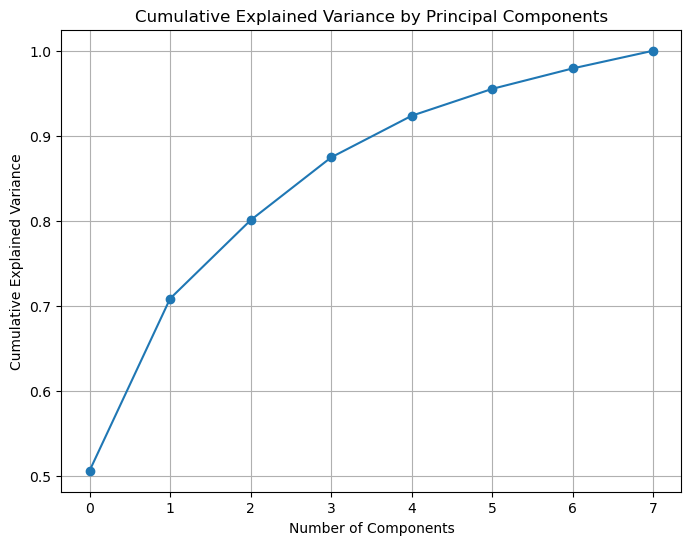

In [64]:
from sklearn.decomposition import PCA

# Fit PCA to your training data
pca = PCA()
pca.fit(X_train)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot to visualize the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.grid()
plt.show()

In [65]:
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
explained_variance = list(zip(range(1, len(cumulative_variance) + 1), cumulative_variance))
print(explained_variance)

[(1, 50.63999999999999), (2, 70.86999999999999), (3, 80.08999999999999), (4, 87.46999999999998), (5, 92.35999999999999), (6, 95.51999999999998), (7, 97.92999999999998), (8, 100.00999999999998)]


Component 1:
Positive Contributions: 'length,' 'width,' 'curb_weight,' 'engine_size,' 'bore,' 'horse_power,' and 'price.'
Minor Positive Contributions: 'wheel_base' and 'city_mpg.'
Negative Contributions: 'heights,' 'peak_rpm,' 'highway_mpg,' and 'fuel_type_gas.'

Component 2:
Dominated by 'heights' and 'price' with opposing contributions.
'length,' 'heights,' and 'city_mpg' also have discernible contributions.

Component 3:
'wheel_base' and 'length' make substantial contributions.
'heights' and 'bore' contribute but in opposing directions.

Component 4:
Primarily influenced by 'heights' and 'bore' with conflicting contributions.
'engine_size' and 'stroke' also show notable contributions.

Component 5:
'curb_weight' and 'engine_size' hold significant contributions.
'stroke' and 'comprassion' make minor contributions.

Component 6:
'engine_size' and 'city_mpg' are the dominant contributors.
'bore' and 'highway_mpg' show minor contributions.

Component 7:
'bore' and 'stroke' have significant contributions but in opposite directions.
'heights' and 'highway_mpg' also exhibit noticeable contributions.

Component 8:
'heights' and 'comprassion' appear as primary contributors.
'wheel_base' and 'fuel_type_gas' have smaller, opposing contributions.
These coefficients help to interpret how each original variable contributes to the creation of principal components, providing insights into their significance in reducing the dataset's dimensionality while preserving essential information.